# Exam 2 Part 2

In [1]:
# Import all necessary libraries and magics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Problem 5 (20 points)
The file ```coffee_prices.csv``` contains the price and review ratings of coffee in walmart stores around the country. We want to determine whether highly rated coffees tend to be more expensive. 

**Answer the following questions.**
1. (2 point) Load the csv file into a dataframe using pandas, and print the first five rows.
2. (3 points) Extract the ```rating``` column and the ```price_per_kg``` column. Plot a scatter plot with price per kg on the x-axis and rating on the y-axis. Plot the coffees whose ratings are above 4.5 in a different color than the ones whose ratings are below or equal to 4.5.
3. (4 points) Define the two variables of interest: the coffee prices whose ratings are above $4.5$ as ```x```, and the coffee prices whose ratings are below or equal to $4.5$ as ```y```. Plot a histogram of the prices of the highly-rated coffee population. Overlay this with the histogram of the prices of low-rated coffees. The two histograms should have the same bins.
4. (5 points) Compute the sample mean estimators and the unbiased sample variance estimators for each variable, ```x``` and ```y```.
5. (6 points) Build a hypothesis test to test the difference-of-means for the two variables. Include the description for $H_0$ and $H_1$, and a conclusion for a significance level $\alpha=0.01$.

In [2]:
df = pd.read_csv('coffee_prices.csv')
df.head()

,title,coffee_type,rating,reviews,price_per_kg
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,12.183807
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,13.262787
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,13.577557
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,8.233048
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,7.333921


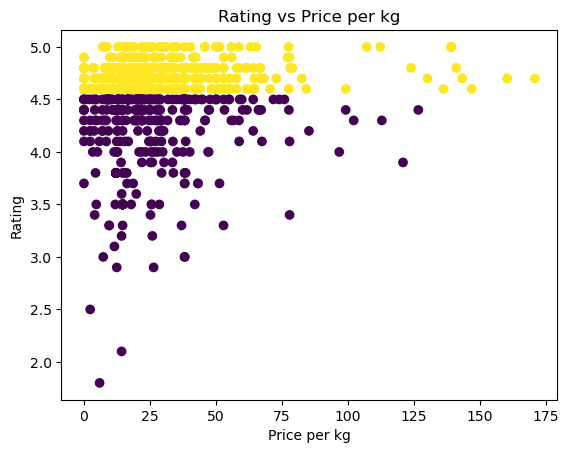

In [3]:
ratings = df['rating']
ppkg = df['price_per_kg'] 
#2. (3 points) Extract the ```rating``` column and the ```price_per_kg``` column. Plot a scatter plot with price per kg on the x-axis and rating on the y-axis. Plot the coffees whose ratings are above 4.5 in a different color than the ones whose ratings are below or equal to 4.5.

plt.scatter(ppkg, ratings, c = ratings > 4.5)
plt.xlabel('Price per kg')
plt.ylabel('Rating')
plt.title('Rating vs Price per kg')
plt.show()


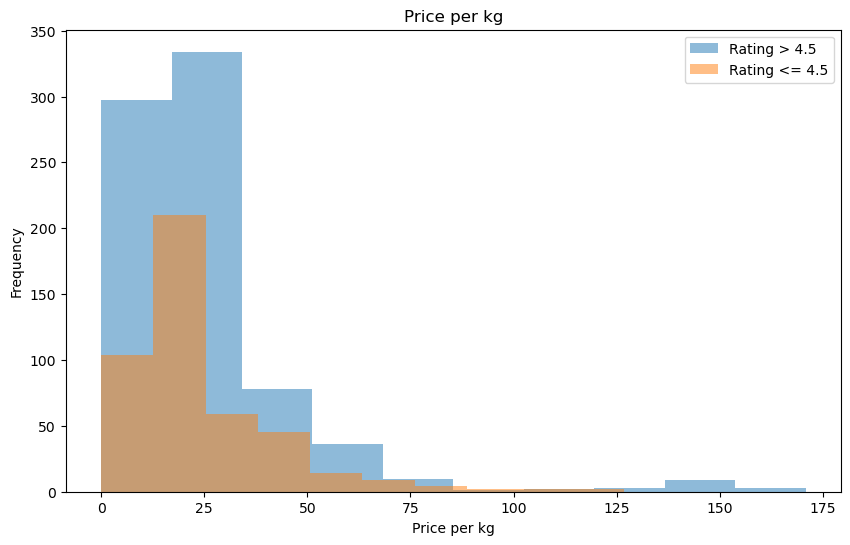

In [4]:
x = df[df['rating'] > 4.5]['price_per_kg']
y = df[df['rating'] <= 4.5]['price_per_kg']

plt.figure(figsize=(10, 6))
plt.hist(x, bins = 10, alpha = 0.5, label = 'Rating > 4.5')
plt.hist(y, bins = 10, alpha = 0.5, label = 'Rating <= 4.5')
plt.xlabel('Price per kg')
plt.ylabel('Frequency')
plt.title('Price per kg')
plt.legend()
plt.show()


In [5]:
mean_of_x = np.mean(x)
mean_of_y = np.mean(y)
var_of_x = x.var(ddof=1)
var_of_y = y.var(ddof=1)

print(f'The mean of x is {mean_of_x}, and the mean of y is {mean_of_y}.')
print(f'The unbiased variance of x is {var_of_x}, and the unbiased variance of y is {var_of_y}.')


The mean of x is 25.353080600504438, and the mean of y is 23.338139387538938.
The unbiased variance of x is 520.7611136639463, and the unbiased variance of y is 327.5404787889991.


In [6]:
from scipy.stats import ttest_ind

# H0: The means of x and y are equal
# H1: The means of x and y are not equal

t_stat, p_value = ttest_ind(x, y, equal_var=False)

alpha = 0.01
print("t-statistic: ", t_stat)
print("p-value: ", p_value)
if p_value < alpha:
    print("Reject the null hypothesis, there is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis, there is no significant difference in means.")


t-statistic:  1.7029712888788944
p-value:  0.0888524973640343
Fail to reject the null hypothesis, there is no significant difference in means.


___

___

# Problem 6 (30 points)

The amount of time that Harrison spends answering a student's question is approximately modeled as an Exponential distribution with mean $4$ minutes, while for Conrad, it is approximately modeled as a Gaussian distribution with mean $11$ minutes, and variance $8$ minutes. After every TA visit, we poll the student to check how long the TA spent with them. From this number (how long the TA spent answering the question), we want to decide which TA the student saw. Our null hypothesis is that the student saw Harrison.

**Answer the following questions.**

1. (5 points) Let ```Harrison``` be the random variable for the amount of time that Harrison spent answering a student's question. Similarly, let ```Conrad``` be the random variable for the amount of time that Conrad spent answering a student's question. Plot the PDFs of the random variables overlaid on top of each other. 
2. (5 points) Based on the amount of time that the student spends with the TA, we decide whether the student saw Harrison or Conrad. Determine the threshold $\gamma$ for the amount of time spent with the TA, such that the probability of assigning it to Harrison when it was in fact Conrad ("a miss") is 10%.
3. (4 points) What is the probability of assigning it to Conrad when it was in fact Harrison ("false alarm"), using the threshold value $\gamma$ found in part (2)?
4. (6 points) Using the computations for the false positive rate (FPR) and the true positive rate (TPR), plot the receiver operating characteristic (ROC) curve along with the reference line, and compute its area under the curve (AUC ROC).
5. (6 points) For the second part of the course, Harrison changed his ways: the amount of time he takes to answer questions is now well-modeled with a Gaussian with mean $4$ and variance $4$. Plot the two PDFs (Harrison's new RV PDF and Conrad's RV PDF) overlaid with each other. Under this new distribution for Harrison, plot the ROC curve and compute the AUC. 
6. (4 point) Which part of the course was more discriminative between Harrison's and Conrad's distribution? i.e., in which part of the course could we make a more accurate decision of which TA answered the question, based on the amount of time the student spends with the TA?

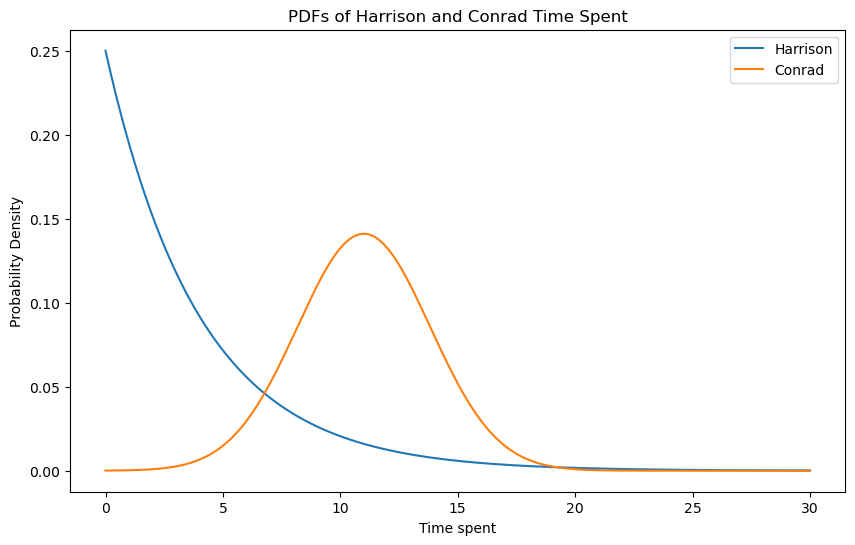

The threshold gamma is 14.6248 minutes.
The probability of false alarm is 0.0258.


In [7]:
from scipy.stats import expon, norm
import numpy as np

# PDF range
x_range = np.linspace(0, 30, 1000)

# Part 1: PDFs of Harrison (Exponential) and Conrad (Gaussian)
lambda_harrison = 1 / 4  # Exponential with mean 4 minutes
mu_conrad = 11           # Gaussian with mean 11 minutes
sigma_conrad = np.sqrt(8)  # Std

pdf_harrison = expon.pdf(x_range, scale=1/lambda_harrison)
pdf_conrad = norm.pdf(x_range, mu_conrad, sigma_conrad)

plt.figure(figsize=(10, 6))
plt.plot(x_range, pdf_harrison, label='Harrison')
plt.plot(x_range, pdf_conrad, label='Conrad')
plt.xlabel('Time spent')
plt.ylabel('Probability Density')
plt.title('PDFs of Harrison and Conrad Time Spent')
plt.legend()
plt.show()

# Finding the 90th percentile of Conrad's time
gamma = norm.ppf(0.90, mu_conrad, sigma_conrad)

# Probability that Harrison's time is greater than gamma
prob_false_alarm = expon.sf(gamma, scale=1/lambda_harrison)

gamma, prob_false_alarm
print(f'The threshold gamma is {gamma:.4f} minutes.')
print(f'The probability of false alarm is {prob_false_alarm:.4f}.')


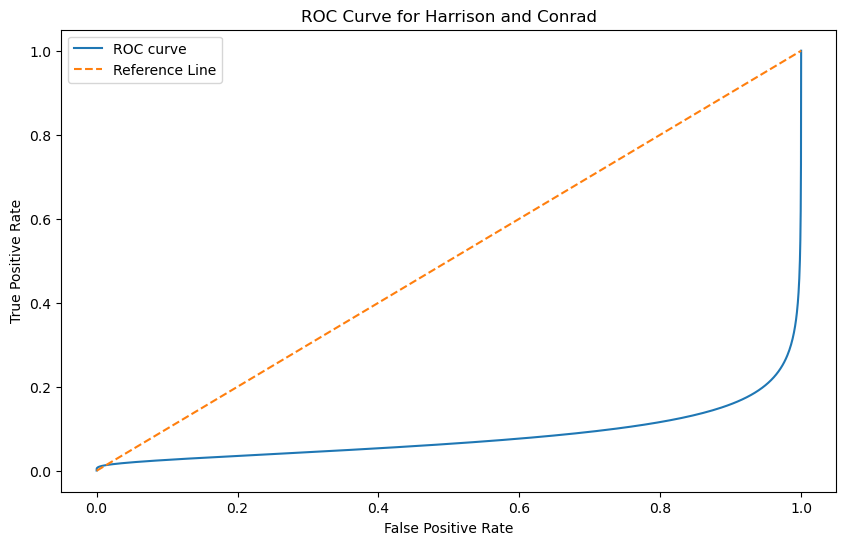

In [8]:
from sklearn.metrics import roc_curve, auc

thresholds = np.linspace(0, 30, 500)

# Fidning  true and false positve 
t = [1 - expon.cdf(t, scale=1/lambda_harrison) for t in thresholds]  # True Positive Rate for Harrison
f = [1 - norm.cdf(t, mu_conrad, sigma_conrad) for t in thresholds]   # False Positive Rate for Conrad

# Calculating AUC
roc_auc = auc(f, t)

# Plotting ROC curve
plt.figure(figsize=(10, 6))
plt.plot(f, t, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Reference Line')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Harrison and Conrad')
plt.legend()
plt.show()


___